IMPORTING THE WEATHER DATASET

In [ ]:
#importing weather data for Freudenstadt
import pandas as pd
import requests
# URL of the webpage containing JSON data
url = "http://139.174.11.24/data?dataset=weatherdataforcities&start=2019-01-01&end=2023-12-31&cityName=Freudenstadt"

# Fetch the data from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse JSON data
    freud_data = response.json()

    # Convert the data to a DataFrame
    freud_df = pd.DataFrame.from_dict(freud_data , orient='index')

    # Reset the index to convert the timestamp to a column
    freud_df.reset_index(inplace=True)

else:
    print("Failed to fetch data. Status code:", response.status_code)





In [ ]:

# drop unwanted columns

freud_df = freud_df.drop(columns = ["index", "time","snow","cityName"])

freud_df.info()

KeyError: "['index', 'time', 'snow', 'cityName'] not found in axis"

In [ ]:
freud_df.head()

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
0,2.4,1.5,94.0,0.0,300.0,7.2,14.0,1034.7,0.0,5.0
1,2.2,1.2,93.0,0.0,290.0,7.9,15.0,1034.4,0.0,4.0
2,2.0,1.3,95.0,0.0,270.0,6.8,13.0,1034.3,0.0,4.0
3,2.4,0.6,88.0,0.0,270.0,9.4,15.0,1034.1,0.0,4.0
4,2.4,0.6,88.0,0.0,260.0,10.4,18.0,1033.7,0.0,4.0


In [ ]:
#Checking for null values
freud_df.isnull().sum()

temp      0
dwpt      0
rhum      0
prcp      0
wdir      0
wspd      0
wpgt      0
pres      0
tsun    427
coco      0
dtype: int64

In [ ]:
# find the percentage of missing values in each feature
freud_df.isnull().sum()/len(freud_df) *100

temp    0.000000
dwpt    0.000000
rhum    0.000000
prcp    0.000000
wdir    0.000000
wspd    0.000000
wpgt    0.000000
pres    0.000000
tsun    0.974352
coco    0.000000
dtype: float64

In [ ]:
mask_nntsun = freud_df['tsun'].isnull()
freud_df[mask_nntsun]

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
3117,8.7,6.1,84.0,0.0,195.0,10.4,16.7,1012.6,NaN,4.0
3118,8.5,7.1,91.0,0.5,194.0,10.8,18.5,1012.4,NaN,7.0
3119,8.3,6.9,91.0,0.1,192.0,11.9,18.5,1012.0,NaN,7.0
3120,7.5,6.6,94.0,0.0,191.0,11.2,16.7,1011.3,NaN,7.0
3121,8.4,7.2,92.0,0.0,210.0,11.5,20.4,1010.9,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...
42812,8.3,7.2,93.0,0.8,260.0,23.8,55.0,1016.8,NaN,8.0
42813,8.5,6.0,84.0,0.3,260.0,24.1,49.0,1017.3,NaN,8.0
42814,7.6,5.7,88.0,0.1,260.0,29.9,59.0,1017.9,NaN,8.0
42815,7.2,6.0,92.0,0.6,270.0,31.3,58.0,1018.0,NaN,8.0


In [ ]:
#Using Linear Regression Imputation to fill missing values in the tsun feature
from sklearn.linear_model import LinearRegression

# seperate the null  values of the tsun feature
test =  freud_df[freud_df["tsun"].isnull()]
X_test = test.drop(columns = ["tsun"] )

#Dropping the null values from the dataset
train = freud_df.dropna()
#Splitting the train data into target and feature
X_train= train.drop(columns = ["tsun"])
y_train = train["tsun"]

#Calling the linear regression model
lr = LinearRegression()
#Fitting the tranining data in to the model
lr.fit(X_train, y_train)
#Predicting the missing tsun values
y_pred = lr.predict(X_test)

#Replacing the missing values with the model prediction
freud_df.loc[freud_df.tsun.isnull(),"tsun"] = y_pred






In [ ]:
#Check if missing values still exists for the tsun feature
freud_df.isnull().sum()/len(freud_df) *100

temp    0.0
dwpt    0.0
rhum    0.0
prcp    0.0
wdir    0.0
wspd    0.0
wpgt    0.0
pres    0.0
tsun    0.0
coco    0.0
dtype: float64

In [ ]:
freud_df.describe()

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,8.770115,4.208005,76.398001,0.178087,200.602296,12.701940,25.232799,1017.629915,12.716921,4.905166
std,7.723427,6.129397,19.108933,0.680094,92.171036,6.406337,13.569379,8.671384,21.978819,3.562264
min,-14.500000,-25.500000,10.000000,0.000000,0.000000,0.000000,0.000000,979.800000,-7.424933,1.000000
25%,2.800000,-0.400000,62.000000,0.000000,100.000000,8.300000,15.000000,1012.900000,0.000000,3.000000
50%,8.400000,4.400000,83.000000,0.000000,240.000000,11.500000,22.000000,1017.800000,0.000000,4.000000
75%,14.400000,9.100000,93.000000,0.000000,270.000000,15.800000,32.000000,1022.600000,17.000000,7.000000
max,32.400000,20.500000,100.000000,20.500000,360.000000,63.700000,118.000000,1045.700000,60.000000,25.000000


In [ ]:
# Check if -99999 exists in all columns and print columns where it exists
columns_with_value = freud_df.apply(lambda col: col.name if -99999 in col.values else None).dropna()

if len(columns_with_value) > 0:
    print(f"The value '{-99999}' exists in the following columns:")
    for col in columns_with_value:
        print(col)
else:
    print(f"The value '{-99999}' does not exist in any column.")

The value '-99999' does not exist in any column.


In [ ]:
freud_df.describe()

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,8.770115,4.208005,76.398001,0.178087,200.602296,12.701940,25.232799,1017.629915,12.716921,4.905166
std,7.723427,6.129397,19.108933,0.680094,92.171036,6.406337,13.569379,8.671384,21.978819,3.562264
min,-14.500000,-25.500000,10.000000,0.000000,0.000000,0.000000,0.000000,979.800000,-7.424933,1.000000
25%,2.800000,-0.400000,62.000000,0.000000,100.000000,8.300000,15.000000,1012.900000,0.000000,3.000000
50%,8.400000,4.400000,83.000000,0.000000,240.000000,11.500000,22.000000,1017.800000,0.000000,4.000000
75%,14.400000,9.100000,93.000000,0.000000,270.000000,15.800000,32.000000,1022.600000,17.000000,7.000000
max,32.400000,20.500000,100.000000,20.500000,360.000000,63.700000,118.000000,1045.700000,60.000000,25.000000


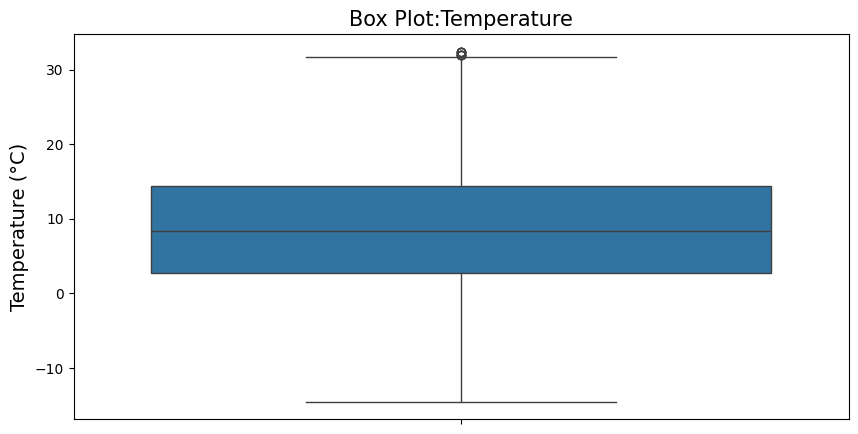

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,5))
sns.boxplot(freud_df.temp)
plt.title('Box Plot:Temperature', fontsize=15)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.show()

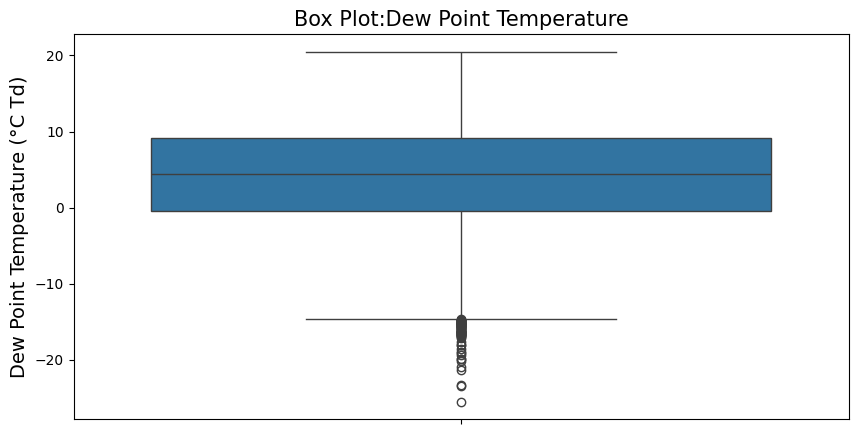

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(freud_df.dwpt)
plt.title('Box Plot:Dew Point Temperature', fontsize=15)
plt.ylabel('Dew Point Temperature (°C Td)', fontsize=14)
plt.show()

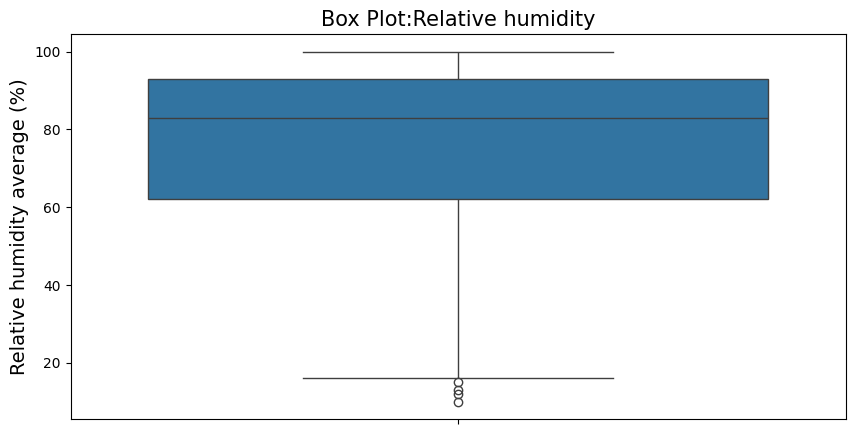

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(freud_df.rhum)
plt.title('Box Plot:Relative humidity', fontsize=15)
plt.ylabel('Relative humidity average (%)', fontsize=14)
plt.show()

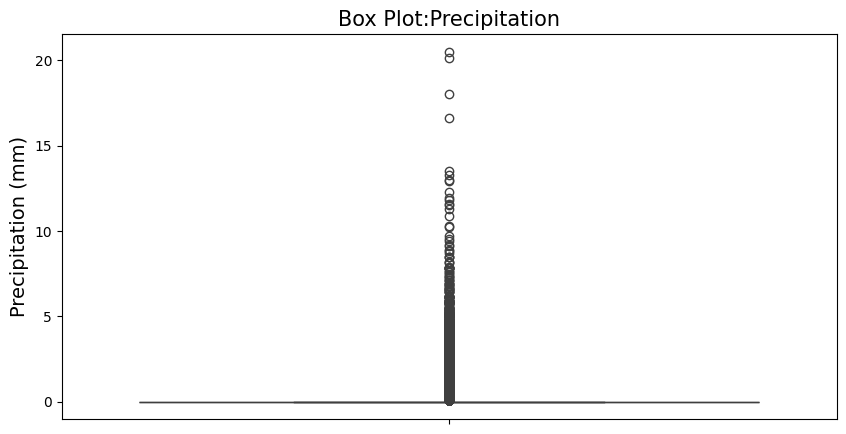

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(freud_df.prcp)
plt.title('Box Plot:Precipitation', fontsize=15)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.show()

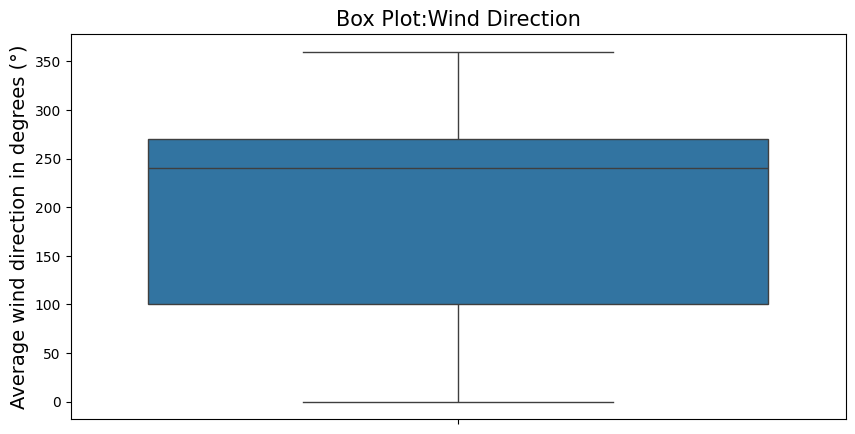

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(freud_df.wdir)
plt.title('Box Plot:Wind Direction', fontsize=15)
plt.ylabel('Average wind direction in degrees (°)', fontsize=14)
plt.show()

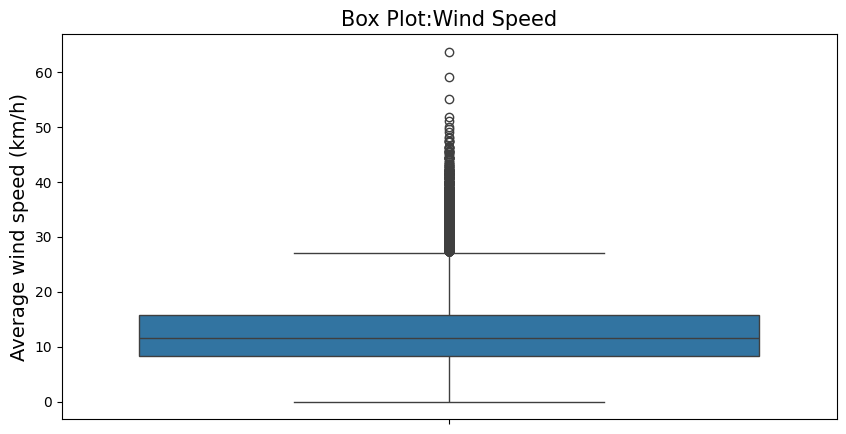

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(freud_df.wspd)
plt.title('Box Plot:Wind Speed', fontsize=15)
plt.ylabel('Average wind speed (km/h)', fontsize=14)
plt.show()

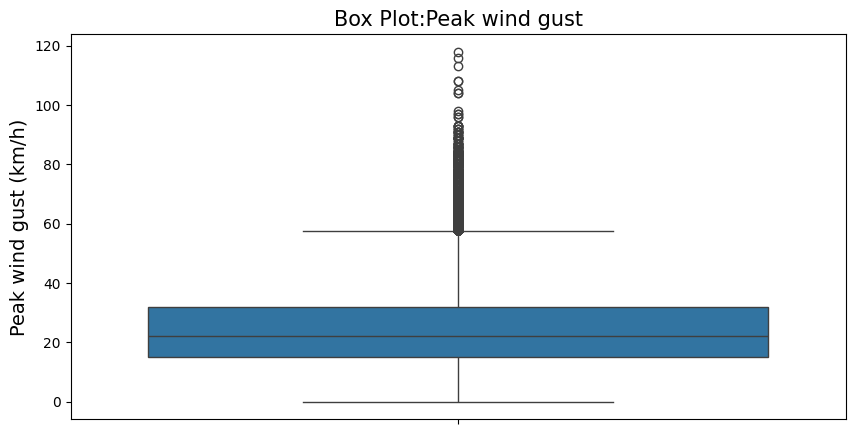

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(freud_df.wpgt)
plt.title('Box Plot:Peak wind gust', fontsize=15)
plt.ylabel('Peak wind gust (km/h)', fontsize=14)
plt.show()

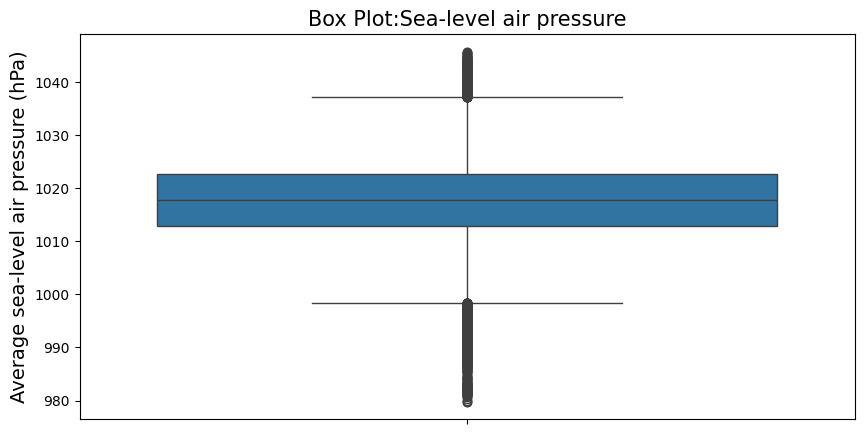

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(freud_df.pres)
plt.title('Box Plot:Sea-level air pressure', fontsize=15)
plt.ylabel('Average sea-level air pressure (hPa)', fontsize=14)
plt.show()

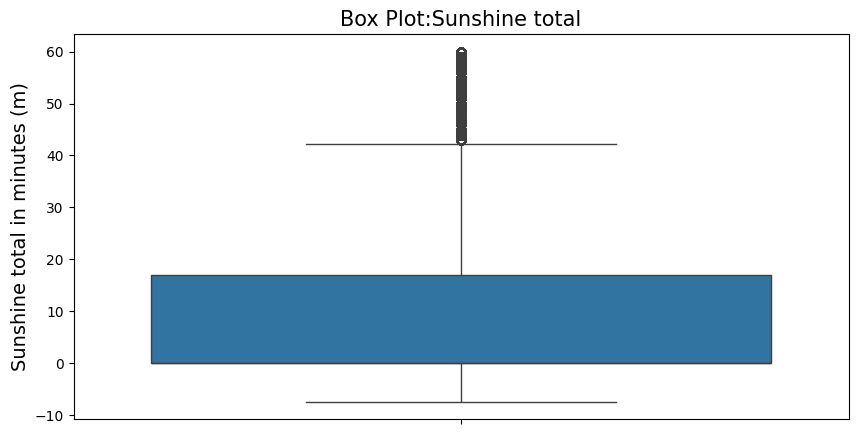

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(freud_df.tsun)
plt.title('Box Plot:Sunshine total', fontsize=15)
plt.ylabel('Sunshine total in minutes (m)', fontsize=14)
plt.show()

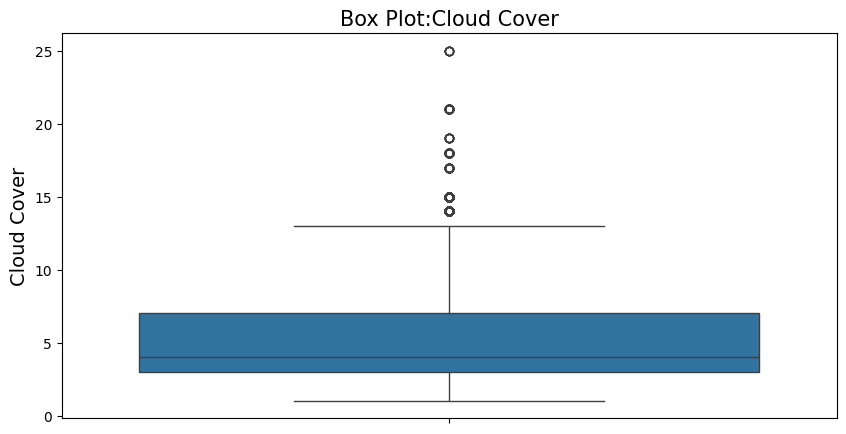

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(freud_df.coco)
plt.title('Box Plot:Cloud Cover', fontsize=15)
plt.ylabel('Cloud Cover', fontsize=14)
plt.show()

APPLYING LOF ON Freudenstadt Dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Number of neighbors for LOF
n_neighbors = 20

# Dictionary to store the percentage of outliers for each feature
outlier_percentages = {}

# Apply LOF to each feature
for feature in freud_df.columns:
# Reshape the data for LOF
 X = freud_df[[feature]].values

 # Fit the LOF model
 lof = LocalOutlierFactor(n_neighbors=n_neighbors)
 y_pred = lof.fit_predict(X)

 # Identify the outliers
 outliers = y_pred == -1

 # Calculate the percentage of outliers
 percentage_outliers = np.mean(outliers) * 100
 outlier_percentages[feature] = percentage_outliers

 print(f'Percentage of outliers in Freudenstadt weather in {feature}: {percentage_outliers:.2f}%')

Percentage of outliers in Freudenstadt weather in temp: 0.30%
Percentage of outliers in Freudenstadt weather in dwpt: 0.27%
Percentage of outliers in Freudenstadt weather in rhum: 0.02%
Percentage of outliers in Freudenstadt weather in prcp: 0.09%
Percentage of outliers in Freudenstadt weather in wdir: 1.31%
Percentage of outliers in Freudenstadt weather in wspd: 0.20%
Percentage of outliers in Freudenstadt weather in wpgt: 0.34%
Percentage of outliers in Freudenstadt weather in pres: 0.60%
Percentage of outliers in Freudenstadt weather in tsun: 0.62%
Percentage of outliers in Freudenstadt weather in coco: 0.03%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm


# Extract features
X = freud_df.values

# Fit Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

# Calculate likelihoods for each data point
means = gnb.theta_
variances = gnb.var_
likelihoods = np.zeros(X.shape[0])

# Ensure means and variances are in correct shape
if means.ndim == 1:
    means = means.reshape(1, -1)
if variances.ndim == 1:
    variances = variances.reshape(1, -1)

# Calculate likelihoods for each data point
for i, x in enumerate(X):
    likelihood = 1
    for j in range(X.shape[1]):
        likelihood *= norm.pdf(x[j], loc=means[0][j], scale=np.sqrt(variances[0][j]))
    likelihoods[i] = likelihood

# Determine anomalies
threshold = np.percentile(likelihoods, 10)  # for example, consider the bottom 10% as anomalies
anomalies = np.where(likelihoods < threshold)[0]

# Calculate percentage of anomalies for each feature
anomalies_freud_df = freud_df.iloc[anomalies]
total_anomalies = len(anomalies)
total_data_points = len(freud_df)

# Calculate anomaly percentage for each feature
feature_anomalies_percentage = {}
for feature in freud_df.columns:
    feature_anomalies_count = (anomalies_freud_df[feature] != freud_df[feature].mode().iloc[0]).sum()
    feature_anomalies_percentage[feature] = (feature_anomalies_count / total_data_points) * 100

print("Number of anomalies detected:", total_anomalies)
print("Percentage of anomalies for each feature:")
for feature, percentage in feature_anomalies_percentage.items():
    print(f"{feature}: {percentage:.2f}%")


Number of anomalies detected: 4383
Percentage of anomalies for each feature:
temp: 9.94%
dwpt: 9.94%
rhum: 9.21%
prcp: 5.05%
wdir: 8.96%
wspd: 9.88%
wpgt: 9.83%
pres: 9.96%
tsun: 3.46%
coco: 9.13%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm



# Initialize a dictionary to store anomaly information for each feature
anomaly_info = {}

# Loop through each feature
for feature in freud_df.columns:
    # Extract the feature values
    X = freud_df[[feature]].values

    # Fit Gaussian Naive Bayes model
    gnb = GaussianNB()
    gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

    # Calculate likelihoods for each data point
    means = gnb.theta_
    variances = gnb.var_
    likelihoods = np.zeros(X.shape[0])

    # Ensure means and variances are in correct shape
    if means.ndim == 1:
        means = means.reshape(1, -1)
    if variances.ndim == 1:
        variances = variances.reshape(1, -1)

    # Calculate likelihoods for each data point
    for i, x in enumerate(X):
        likelihood = norm.pdf(x[0], loc=means[0][0], scale=np.sqrt(variances[0][0]))
        likelihoods[i] = likelihood

    # Determine anomalies using mean and standard deviation
    mean_likelihood = np.mean(likelihoods)
    std_likelihood = np.std(likelihoods)
    threshold = mean_likelihood - 2 * std_likelihood  # 2 standard deviations below the mean
    anomalies = np.where(likelihoods < threshold)[0]

    # Calculate percentage of anomalies for this feature
    total_anomalies = len(anomalies)
    total_data_points = len(freud_df)
    anomaly_percentage = (total_anomalies / total_data_points) * 100

    # Store the anomaly information
    anomaly_info[feature] = {
        'total_anomalies': total_anomalies,
        'anomaly_percentage': anomaly_percentage,
        'anomalies': anomalies
    }

# Print results
for feature, info in anomaly_info.items():
    print(f"Feature: {feature}")
    print(f"  Number of anomalies detected: {info['total_anomalies']}")
    print(f"  Percentage of anomalies: {info['anomaly_percentage']:.2f}%")



Feature: temp
  Number of anomalies detected: 1612
  Percentage of anomalies: 3.68%
Feature: dwpt
  Number of anomalies detected: 1552
  Percentage of anomalies: 3.54%
Feature: rhum
  Number of anomalies detected: 2639
  Percentage of anomalies: 6.02%
Feature: prcp
  Number of anomalies detected: 2672
  Percentage of anomalies: 6.10%
Feature: wdir
  Number of anomalies detected: 1026
  Percentage of anomalies: 2.34%
Feature: wspd
  Number of anomalies detected: 2708
  Percentage of anomalies: 6.18%
Feature: wpgt
  Number of anomalies detected: 2809
  Percentage of anomalies: 6.41%
Feature: pres
  Number of anomalies detected: 3028
  Percentage of anomalies: 6.91%
Feature: tsun
  Number of anomalies detected: 5897
  Percentage of anomalies: 13.46%
Feature: coco
  Number of anomalies detected: 2798
  Percentage of anomalies: 6.38%


AUTOENCODER ON WEATHER

In [ ]:
# import numpy as np
# import pandas as pd
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential



# #to save all features
# features_auto_w = freud_df.columns.tolist()


# # DataFrame to store anomaly scores for each feature
# anomaly_scores_auto_w = pd.DataFrame(index=freud_df.index)

# # Loop through each feature
# for feature in features_auto_w :
#     # Scale the feature data
#     scaler = MinMaxScaler()
#     scaled_feature_auto_w  = scaler.fit_transform(freud_df[[feature]])

#     # Define the autoencoder model
#     model_auto_w  = Sequential([
#         Dense(32, activation='relu', input_shape=(1,)),
#         Dense(16, activation='relu'),
#         Dense(32, activation='relu'),
#         Dense(1, activation='sigmoid')
#     ])

#     model_auto_w .compile(optimizer='adam', loss='mean_squared_error')

#      #Train the autoencoder
#     model_auto_w.fit(scaled_feature_auto_w , scaled_feature_auto_w , epochs=50, batch_size=32, validation_split=0.1, verbose=0)

#     # Get reconstruction loss
#     reconstructed_feature_auto_w  = model_auto_w.predict(scaled_feature_auto_w )
#     reconstruction_loss_auto_w  = np.mean(np.square(scaled_feature_auto_w  - reconstructed_feature_auto_w ), axis=1)

#     # Store the reconstruction loss (anomaly score) in the DataFrame
#     anomaly_scores_auto_w [feature] = reconstruction_loss_auto_w



1370/1370 [==============================] - 2s 1ms/step


In [ ]:

# print(reconstruction_loss_auto_w)
# # Calculate the threshold as the 90th percentile of the reconstruction loss
# threshold_auto_w = np.percentile(reconstruction_loss_auto_w, 90)

#     # Identify anomalies
# anomalies_auto_w = reconstruction_loss_auto_w > threshold_auto_w

# for feature in features_auto_w:
#     anomalies_auto_w = anomaly_scores_auto_w[feature] > threshold_auto_w
#     anomaly_percentage_auto_w = np.mean(anomalies_auto_w) * 100
#     print(f'Feature: {feature}, Anomaly Percentage: {anomaly_percentage_auto_w:.2f}%')


#     # Store the reconstruction loss (anomaly score) in the DataFrame
# anomaly_scores_auto_w[feature] = reconstruction_loss_auto_w


# # Combine anomaly scores with original data for easier analysis
# combined_data_auto_w = pd.concat([freud_df, anomaly_scores_auto_w.add_suffix('_anomaly_score')], axis=1)

# # Save the combined data with anomaly scores
# combined_data_auto_w.to_csv('freud_df_with_anomaly_scores_auto_w.csv', index=False)

# # Display the first few rows of the combined data
# combined_data_auto_w.head()

[8.98453424e-07 6.69561644e-07 6.69561644e-07 ... 1.07695938e-06
 1.07695938e-06 2.00868045e-06]
Feature: temp, Anomaly Percentage: 66.70%
Feature: dwpt, Anomaly Percentage: 3.03%
Feature: rhum, Anomaly Percentage: 2.88%
Feature: prcp, Anomaly Percentage: 3.77%
Feature: wdir, Anomaly Percentage: 54.66%
Feature: wspd, Anomaly Percentage: 28.62%
Feature: wpgt, Anomaly Percentage: 16.34%
Feature: pres, Anomaly Percentage: 30.36%
Feature: tsun, Anomaly Percentage: 19.58%
Feature: coco, Anomaly Percentage: 9.93%


,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco,temp_anomaly_score,dwpt_anomaly_score,rhum_anomaly_score,prcp_anomaly_score,wdir_anomaly_score,wspd_anomaly_score,wpgt_anomaly_score,pres_anomaly_score,tsun_anomaly_score,coco_anomaly_score
0,2.4,1.5,94.0,0.0,300.0,7.2,14.0,1034.7,0.0,5.0,7.953507e-07,3.485992e-07,1.073888e-07,1.517144e-08,8.181139e-05,1.978639e-08,1.488621e-08,0.000009,0.000002,8.984534e-07
1,2.2,1.2,93.0,0.0,290.0,7.9,15.0,1034.4,0.0,4.0,4.812895e-07,4.856893e-07,1.908533e-07,1.517144e-08,1.282499e-05,1.342096e-06,7.230641e-07,0.000018,0.000002,6.695616e-07
2,2.0,1.3,95.0,0.0,270.0,6.8,13.0,1034.3,0.0,4.0,2.255056e-07,4.416085e-07,4.813190e-07,1.517144e-08,1.294166e-06,1.073140e-07,3.665762e-07,0.000022,0.000002,6.695616e-07
3,2.4,0.6,88.0,0.0,270.0,9.4,15.0,1034.1,0.0,4.0,7.953507e-07,6.874602e-07,3.072830e-07,1.517144e-08,1.294166e-06,6.067498e-07,7.230641e-07,0.000031,0.000002,6.695616e-07
4,2.4,0.6,88.0,0.0,260.0,10.4,18.0,1033.7,0.0,4.0,7.953507e-07,6.874602e-07,3.072830e-07,1.517144e-08,1.912366e-07,6.934308e-07,1.712032e-06,0.000057,0.000002,6.695616e-07


XGBOOST WITH DYNAMIC THRESHOLD

In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Sample Data (Replace with your dataset)
# Assuming a dataframe Mun_df with 100 rows and 10 features

# Define anomaly detection function
def detect_anomalies(Mun_df):
    anomalies = pd.DataFrame(index=Mun_df.index)
    anomaly_percentages = {}

    for feature in Mun_df.columns:
        X = Mun_df.drop(columns=[feature])
        y = Mun_df[feature]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train XGBoost model
        model = XGBRegressor()
        model.fit(X_train, y_train)

        # Predict on the whole dataset
        y_pred = model.predict(X)

        # Calculate prediction errors
        errors = np.abs(y - y_pred)

        # Determine dynamic threshold using standard deviation
        mean_error = np.mean(errors)
        std_error = np.std(errors)
        threshold = mean_error + 2 * std_error  # Consider 2 standard deviations from the mean

        # Flag anomalies
        anomaly_flags = errors > threshold
        anomalies[feature] = anomaly_flags

        # Calculate anomaly percentage
        anomaly_percentages[feature] = (anomaly_flags.sum() / len(Mun_df)) * 100

        # Print summary
        print(f"Feature: {feature}")
        print(f"Mean Error: {mean_error:.4f}")
        print(f"Standard Deviation of Error: {std_error:.4f}")
        print(f"Threshold: {threshold:.4f}")
        print(f"Anomalies detected: {anomaly_flags.sum()}/{len(Mun_df)} ({anomaly_percentages[feature]:.2f}%)")
        print("-" * 40)

    return anomalies, anomaly_percentages



# Detect anomalies
anomalies_df, anomaly_percentages = detect_anomalies(freud_df)

# Print anomaly percentages
print("\nAnomaly Percentages per Feature:")
for feature, percentage in anomaly_percentages.items():
    print(f"{feature}: {percentage:.2f}%")


Feature: temp
Mean Error: 0.0954
Standard Deviation of Error: 0.1051
Threshold: 0.3055
Anomalies detected: 1662/43824 (3.79%)
----------------------------------------
Feature: dwpt
Mean Error: 0.0924
Standard Deviation of Error: 0.0985
Threshold: 0.2894
Anomalies detected: 1595/43824 (3.64%)
----------------------------------------
Feature: rhum
Mean Error: 0.8401
Standard Deviation of Error: 0.7778
Threshold: 2.3956
Anomalies detected: 1969/43824 (4.49%)
----------------------------------------
Feature: prcp
Mean Error: 0.1168
Standard Deviation of Error: 0.3264
Threshold: 0.7696
Anomalies detected: 1542/43824 (3.52%)
----------------------------------------
Feature: wdir
Mean Error: 49.6681
Standard Deviation of Error: 45.3335
Threshold: 140.3350
Anomalies detected: 2304/43824 (5.26%)
----------------------------------------
Feature: wspd
Mean Error: 1.1550
Standard Deviation of Error: 1.0296
Threshold: 3.2143
Anomalies detected: 2006/43824 (4.58%)
-----------------------------------

IRRADIATION DATASET

In [ ]:
import pandas as pd
import requests
#importing irradiation data for Meiningen
# URL of the webpage containing JSON data
url = "http://139.174.11.24/data?dataset=irradiationdataforcities&start=2019-01-01&end=2023-12-31&cityName=Freudenstadt"

# Fetch the data from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse JSON data
    data = response.json()

    # Convert the data to a DataFrame
    freud_df_irrad = pd.DataFrame.from_dict(data, orient='index')


else:
    print("Failed to fetch data. Status code:", response.status_code)


In [ ]:
freud_df_irrad.head()

,time,Observation period,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI,Reliability,cityName
1546300800000,2019-01-01 00:00:00,2019-01-01T00:00:00.0/2019-01-01T00:15:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Freudenstadt
1546301700000,2019-01-01 00:15:00,2019-01-01T00:15:00.0/2019-01-01T00:30:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Freudenstadt
1546302600000,2019-01-01 00:30:00,2019-01-01T00:30:00.0/2019-01-01T00:45:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Freudenstadt
1546303500000,2019-01-01 00:45:00,2019-01-01T00:45:00.0/2019-01-01T01:00:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Freudenstadt
1546304400000,2019-01-01 01:00:00,2019-01-01T01:00:00.0/2019-01-01T01:15:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Freudenstadt


In [ ]:

# drop unwanted columns
clean_freud_df = freud_df_irrad.drop(columns = ["time", "Observation period", "Reliability", "cityName"])
clean_freud_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175296 entries, 1546300800000 to 1704066300000
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TOA            175296 non-null  object 
 1   Clear sky GHI  175296 non-null  object 
 2   Clear sky BHI  175296 non-null  object 
 3   Clear sky DHI  175296 non-null  object 
 4   Clear sky BNI  175296 non-null  object 
 5   GHI            175296 non-null  float64
 6   BHI            175296 non-null  object 
 7   DHI            175296 non-null  object 
 8   BNI            175296 non-null  object 
dtypes: float64(1), object(8)
memory usage: 13.4+ MB


In [ ]:
#Get the percentage of null values in the dataset
clean_freud_df.isnull().sum() /len(freud_df_irrad) *(100)

TOA              0.0
Clear sky GHI    0.0
Clear sky BHI    0.0
Clear sky DHI    0.0
Clear sky BNI    0.0
GHI              0.0
BHI              0.0
DHI              0.0
BNI              0.0
dtype: float64

In [ ]:

df_f = clean_freud_df.select_dtypes("object").astype("float")
df_f["GHI"] = clean_freud_df["GHI"]

In [ ]:
df_f.describe()

,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,BHI,DHI,BNI,GHI
count,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000
mean,72.886918,52.959387,42.059617,10.899770,83.344265,20.349586,15.947547,40.528225,36.297133
std,93.695052,71.743556,59.704263,13.741062,93.854525,42.990712,24.174871,70.510369,56.985516
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.658750,0.672800,0.052000,0.597600,0.970200,0.000000,0.534000,0.000000,0.580800
75%,138.512425,97.657600,75.145800,20.450400,186.877225,13.335550,24.386725,52.055425,53.861500
max,298.645200,244.800200,222.628900,96.541600,265.470700,222.628900,129.260100,262.041500,244.800200


In [ ]:
clean_freud_df.head()

,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI
1546300800000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546301700000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546302600000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546303500000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546304400000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000


In [ ]:

# Check if -99999 exists in all columns and print columns where it exists
columns_with_value = clean_freud_df.apply(lambda col: col.name if -99999 in col.values else None).dropna()

if len(columns_with_value) > 0:
    print(f"The value '{-99999}' exists in the following columns:")
    for col in columns_with_value:
        print(col)
else:
    print(f"The value '{-99999}' does not exist in any column.")

The value '-99999' does not exist in any column.


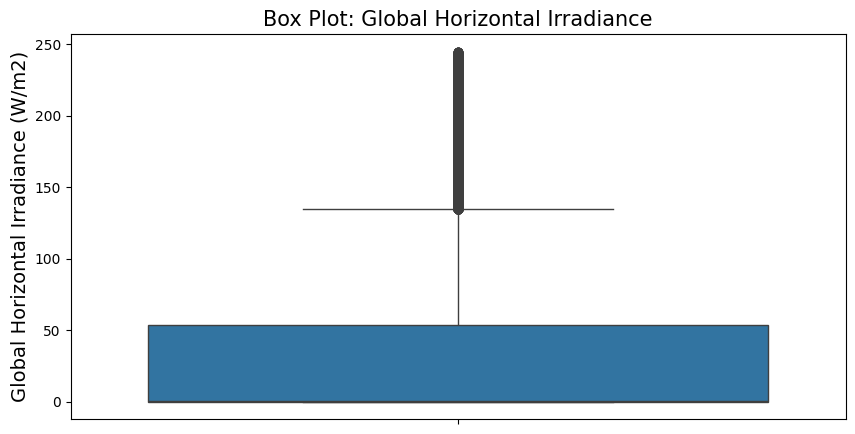

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(clean_freud_df.GHI)
plt.title('Box Plot: Global Horizontal Irradiance', fontsize=15)
plt.ylabel('Global Horizontal Irradiance (W/m2)', fontsize=14)
plt.show()

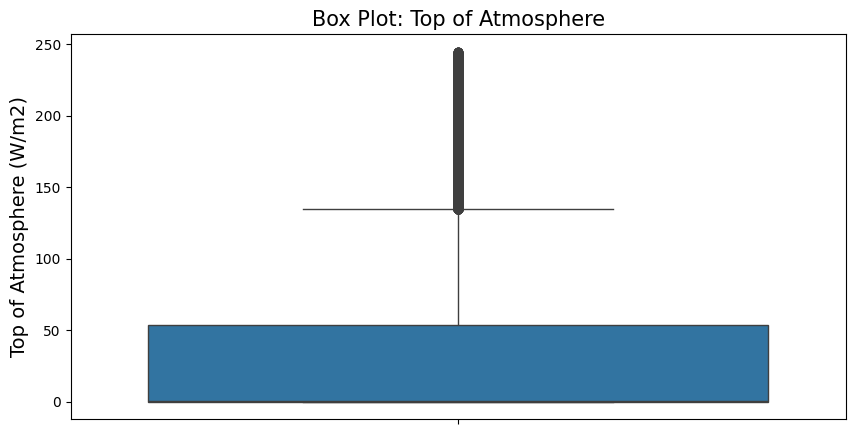

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(clean_freud_df.GHI)
plt.title('Box Plot: Top of Atmosphere', fontsize=15)
plt.ylabel('Top of Atmosphere (W/m2)', fontsize=14)
plt.show()

LOF WITHOUT CONTAMINATION

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Number of neighbors for LOF
n_neighbors = 20


# Dictionary to store the percentage of outliers for each feature
outlier_percentages = {}

# Apply LOF to each feature
for feature in clean_freud_df.columns:
# Reshape the data for LOF
 X = clean_freud_df[[feature]].values

 # Fit the LOF model
 lof = LocalOutlierFactor(n_neighbors=n_neighbors)
 y_pred = lof.fit_predict(X)

 # Identify the outliers
 outliers = y_pred == -1

 # Calculate the percentage of outliers
 percentage_outliers = np.mean(outliers) * 100
 outlier_percentages[feature] = percentage_outliers

 print(f'Percentage of outliers in osnabrueck irradiation in {feature}: {percentage_outliers:.2f}%')

Percentage of outliers in osnabrueck irradiation in TOA: 0.06%
Percentage of outliers in osnabrueck irradiation in Clear sky GHI: 0.01%
Percentage of outliers in osnabrueck irradiation in Clear sky BHI: 0.04%
Percentage of outliers in osnabrueck irradiation in Clear sky DHI: 0.01%
Percentage of outliers in osnabrueck irradiation in Clear sky BNI: 0.02%
Percentage of outliers in osnabrueck irradiation in GHI: 0.01%
Percentage of outliers in osnabrueck irradiation in BHI: 0.13%
Percentage of outliers in osnabrueck irradiation in DHI: 0.01%
Percentage of outliers in osnabrueck irradiation in BNI: 0.07%


NAIVE BAYES FOR IRRADIATION

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm

# Assuming clean_Osna_Irrad is your DataFrame loaded from your dataset
# Example steps to handle data types and missing values

# Step 1: Check and Convert Data Types
# Convert all columns to numeric (float64)
clean_freud_df =  clean_freud_df.apply(pd.to_numeric, errors='coerce')

# Step 2: Handle Missing Values
clean_freud_df =  clean_freud_df.dropna()  # Drop rows with NaN values

# Extract features
X =  clean_freud_df.values

# Fit Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

# Calculate likelihoods for each data point
means = gnb.theta_
variances = np.var(X, axis=0) + 1e-9  # Adding a small value for numerical stability

likelihoods = np.zeros(X.shape[0])

# Ensure means and variances are in correct shape
if means.ndim == 1:
    means = means.reshape(1, -1)
if variances.ndim == 1:
    variances = variances.reshape(1, -1)

# Calculate likelihoods for each data point
for i, x in enumerate(X):
    likelihood = 1
    for j in range(X.shape[1]):
        likelihood *= norm.pdf(x[j], loc=means[0][j], scale=np.sqrt(variances[0][j]))
    likelihoods[i] = likelihood

# Determine anomalies
threshold = np.percentile(likelihoods, 10)  # for example, consider the bottom 10% as anomalies
anomalies = np.where(likelihoods < threshold)[0]

# Calculate percentage of anomalies for each feature
anomalies_clean_freud_df =  clean_freud_df.iloc[anomalies]
total_anomalies = len(anomalies)
total_data_points = len( clean_freud_df)

# Calculate anomaly percentage for each feature
feature_anomalies_percentage = {}
for feature in  clean_freud_df.columns:
    feature_anomalies_count = (anomalies_clean_freud_df[feature] !=  clean_freud_df[feature].mode().iloc[0]).sum()
    feature_anomalies_percentage[feature] = (feature_anomalies_count / total_data_points) * 100

print("Number of anomalies detected:", total_anomalies)
print("Percentage of anomalies for each feature:")
for feature, percentage in feature_anomalies_percentage.items():
    print(f"{feature}: {percentage:.2f}%")


Number of anomalies detected: 17530
Percentage of anomalies for each feature:
TOA: 10.00%
Clear sky GHI: 10.00%
Clear sky BHI: 10.00%
Clear sky DHI: 10.00%
Clear sky BNI: 10.00%
GHI: 10.00%
BHI: 9.98%
DHI: 10.00%
BNI: 9.98%


In [ ]:
clean_freud = clean_freud_df.select_dtypes(include=['object']).astype('float')
clean_freud["GHI"] = clean_freud_df["GHI"]
clean_freud.info()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm


# Initialize a dictionary to store anomaly information for each feature
anomaly_info = {}

# Loop through each feature
for feature in clean_freud.columns:
    # Extract the feature values
    X = clean_freud[[feature]].values

    # Fit Gaussian Naive Bayes model
    gnb = GaussianNB()
    gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

    # Calculate likelihoods for each data point
    means = gnb.theta_
    variances = gnb.var_
    likelihoods = np.zeros(X.shape[0])

    # Ensure means and variances are in correct shape
    if means.ndim == 1:
        means = means.reshape(1, -1)
    if variances.ndim == 1:
        variances = variances.reshape(1, -1)

    # Calculate likelihoods for each data point
    for i, x in enumerate(X):
        likelihood = norm.pdf(x[0], loc=means[0][0], scale=np.sqrt(variances[0][0]))
        likelihoods[i] = likelihood

    # Determine anomalies using mean and standard deviation
    mean_likelihood = np.mean(likelihoods)
    std_likelihood = np.std(likelihoods)
    threshold = mean_likelihood - 2 * std_likelihood  # 2 standard deviations below the mean
    anomalies = np.where(likelihoods < threshold)[0]

    # Calculate percentage of anomalies for this feature
    total_anomalies = len(anomalies)
    total_data_points = len(clean_freud)
    anomaly_percentage = (total_anomalies / total_data_points) * 100

    # Store the anomaly information
    anomaly_info[feature] = {
        'total_anomalies': total_anomalies,
        'anomaly_percentage': anomaly_percentage,
        'anomalies': anomalies
    }

# Print results
for feature, info in anomaly_info.items():
    print(f"Feature: {feature}")
    print(f"  Number of anomalies detected: {info['total_anomalies']}")
    print(f"  Percentage of anomalies: {info['anomaly_percentage']:.2f}%")



Feature: TOA
  Number of anomalies detected: 16070
  Percentage of anomalies: 9.17%
Feature: Clear sky GHI
  Number of anomalies detected: 16951
  Percentage of anomalies: 9.67%
Feature: Clear sky BHI
  Number of anomalies detected: 17183
  Percentage of anomalies: 9.80%
Feature: Clear sky DHI
  Number of anomalies detected: 13330
  Percentage of anomalies: 7.60%
Feature: Clear sky BNI
  Number of anomalies detected: 6186
  Percentage of anomalies: 3.53%
Feature: BHI
  Number of anomalies detected: 16431
  Percentage of anomalies: 9.37%
Feature: DHI
  Number of anomalies detected: 15461
  Percentage of anomalies: 8.82%
Feature: BNI
  Number of anomalies detected: 19564
  Percentage of anomalies: 11.16%
Feature: GHI
  Number of anomalies detected: 17070
  Percentage of anomalies: 9.74%


AUTOENCODER ON IRRADIATION DATASET

In [ ]:
# import numpy as np
# import pandas as pd
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential



# #to save all features
# features_auto_i = clean_freud_df.columns.tolist()


# # DataFrame to store anomaly scores for each feature
# anomaly_scores_auto_i = pd.DataFrame(index=clean_freud_df.index)

# # Loop through each feature
# for feature in features_auto_i :
#     # Scale the feature data
#     scaler = MinMaxScaler()
#     scaled_feature_auto_i  = scaler.fit_transform(clean_freud_df[[feature]])

#     # Define the autoencoder model
#     model_auto_i  = Sequential([
#         Dense(32, activation='relu', input_shape=(1,)),
#         Dense(16, activation='relu'),
#         Dense(32, activation='relu'),
#         Dense(1, activation='sigmoid')
#     ])

#     model_auto_i .compile(optimizer='adam', loss='mean_squared_error')

#      #Train the autoencoder
#     model_auto_i.fit(scaled_feature_auto_i , scaled_feature_auto_i , epochs=50, batch_size=32, validation_split=0.1, verbose=0)

#     # Get reconstruction loss
#     reconstructed_feature_auto_i  = model_auto_i.predict(scaled_feature_auto_i)
#     reconstruction_loss_auto_i  = np.mean(np.square(scaled_feature_auto_i  - reconstructed_feature_auto_i), axis=1)

#     # Store the reconstruction loss (anomaly score) in the DataFrame
#     anomaly_scores_auto_i [feature] = reconstruction_loss_auto_i



5478/5478 [==============================] - 8s 1ms/step


In [ ]:

# print(reconstruction_loss_auto_i)
# # Calculate the threshold as the 90th percentile of the reconstruction loss
# threshold_auto_i = np.percentile(reconstruction_loss_auto_i, 90)

#     # Identify anomalies
# anomalies_auto_i = reconstruction_loss_auto_i > threshold_auto_i

# for feature in features_auto_i:
#     anomalies_auto_i = anomaly_scores_auto_i[feature] > threshold_auto_i
#     anomaly_percentage_auto_i = np.mean(anomalies_auto_i) * 100
#     print(f'Feature: {feature}, Anomaly Percentage: {anomaly_percentage_auto_i:.2f}%')


#     # Store the reconstruction loss (anomaly score) in the DataFrame
# anomaly_scores_auto_i[feature] = reconstruction_loss_auto_i


# # Combine anomaly scores with original data for easier analysis
# combined_data_auto_i = pd.concat([clean_freud_df, anomaly_scores_auto_i.add_suffix('_anomaly_score')], axis=1)

# # Save the combined data with anomaly scores
# combined_data_auto_i.to_csv('clean_freud_df_with_anomaly_scores_auto_i.csv', index=False)

# # Display the first few rows of the combined data
# combined_data_auto_i.head()






[7.82310076e-09 7.82310076e-09 7.82310076e-09 ... 7.82310076e-09
 7.82307116e-09 7.82307116e-09]
Feature: TOA, Anomaly Percentage: 34.17%
Feature: Clear sky GHI, Anomaly Percentage: 29.47%
Feature: Clear sky BHI, Anomaly Percentage: 29.88%
Feature: Clear sky DHI, Anomaly Percentage: 10.25%
Feature: Clear sky BNI, Anomaly Percentage: 26.93%
Feature: GHI, Anomaly Percentage: 6.92%
Feature: BHI, Anomaly Percentage: 12.55%
Feature: DHI, Anomaly Percentage: 13.20%
Feature: BNI, Anomaly Percentage: 10.00%


,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI,TOA_anomaly_score,Clear sky GHI_anomaly_score,Clear sky BHI_anomaly_score,Clear sky DHI_anomaly_score,Clear sky BNI_anomaly_score,GHI_anomaly_score,BHI_anomaly_score,DHI_anomaly_score,BNI_anomaly_score
1546300800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.996561e-07,2.144898e-07,3.683604e-08,2.014373e-08,8.780115e-08,3.375507e-08,1.099173e-08,6.329557e-08,7.823101e-09
1546301700000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.996561e-07,2.144898e-07,3.683604e-08,2.014373e-08,8.780115e-08,3.375507e-08,1.099173e-08,6.329557e-08,7.823101e-09
1546302600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.996561e-07,2.144898e-07,3.683604e-08,2.014373e-08,8.780115e-08,3.375507e-08,1.099173e-08,6.329557e-08,7.823101e-09
1546303500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.996561e-07,2.144898e-07,3.683604e-08,2.014373e-08,8.780115e-08,3.375507e-08,1.099173e-08,6.329557e-08,7.823101e-09
1546304400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.996561e-07,2.144898e-07,3.683604e-08,2.014373e-08,8.780115e-08,3.375507e-08,1.099173e-08,6.329557e-08,7.823101e-09


In [ ]:
mask = clean_freud_df["GHI"] ==0.0
(len(clean_freud_df[mask])/len(clean_freud_df)) *100


48.87276378240234

In [ ]:
clean_freud = clean_freud_df.select_dtypes(include=['object']).astype('float')
clean_freud["GHI"] = clean_freud_df["GHI"]
clean_freud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175296 entries, 1546300800000 to 1704066300000
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TOA            175296 non-null  float64
 1   Clear sky GHI  175296 non-null  float64
 2   Clear sky BHI  175296 non-null  float64
 3   Clear sky DHI  175296 non-null  float64
 4   Clear sky BNI  175296 non-null  float64
 5   BHI            175296 non-null  float64
 6   DHI            175296 non-null  float64
 7   BNI            175296 non-null  float64
 8   GHI            175296 non-null  float64
dtypes: float64(9)
memory usage: 17.4+ MB


XGBOOST WITH DYNAMIC THRESHOLD

In [ ]:

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Sample Data (Replace with your dataset)
# Assuming a dataframe with 100 rows and 10 features


# Define anomaly detection function
def detect_anomalies(Mun_df):
    anomalies = pd.DataFrame(index=Mun_df.index)
    anomaly_percentages = {}

    for feature in Mun_df.columns:
        X = Mun_df.drop(columns=[feature])
        y = Mun_df[feature]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train XGBoost model
        model = XGBRegressor()
        model.fit(X_train, y_train)

        # Predict on the whole dataset
        y_pred = model.predict(X)

        # Calculate prediction errors
        errors = np.abs(y - y_pred)

        # Determine dynamic threshold using standard deviation
        mean_error = np.mean(errors)
        std_error = np.std(errors)
        threshold = mean_error + 2 * std_error  # Consider 2 standard deviations from the mean

        # Flag anomalies
        anomaly_flags = errors > threshold
        anomalies[feature] = anomaly_flags

        # Calculate anomaly percentage
        anomaly_percentages[feature] = (anomaly_flags.sum() / len(Mun_df)) * 100

        # Print summary
        print(f"Feature: {feature}")
        print(f"Threshold: {threshold:.4f}")
        print(f"Anomalies detected: {anomaly_flags.sum()}/{len(Mun_df)} ({anomaly_percentages[feature]:.2f}%)")
        print("-" * 40)

    return anomalies, anomaly_percentages

# Detect anomalies
anomalies_df, anomaly_percentages = detect_anomalies(clean_freud)


# Print anomaly percentages
print("\nAnomaly Percentages per Feature:")
for feature, percentage in anomaly_percentages.items():
    print(f"{feature}: {percentage:.2f}%")


Feature: TOA
Threshold: 1.9701
Anomalies detected: 9874/175296 (5.63%)
----------------------------------------
Feature: Clear sky GHI
Threshold: 1.0247
Anomalies detected: 9874/175296 (5.63%)
----------------------------------------
Feature: Clear sky BHI
Threshold: 0.9115
Anomalies detected: 9416/175296 (5.37%)
----------------------------------------
Feature: Clear sky DHI
Threshold: 1.3212
Anomalies detected: 9434/175296 (5.38%)
----------------------------------------
Feature: Clear sky BNI
Threshold: 4.4542
Anomalies detected: 10046/175296 (5.73%)
----------------------------------------
Feature: BHI
Threshold: 0.9990
Anomalies detected: 9604/175296 (5.48%)
----------------------------------------
Feature: DHI
Threshold: 1.2626
Anomalies detected: 8476/175296 (4.84%)
----------------------------------------
Feature: BNI
Threshold: 2.9011
Anomalies detected: 8801/175296 (5.02%)
----------------------------------------
Feature: GHI
Threshold: 1.2496
Anomalies detected: 8161/175296 